# Training

In [1]:
%%capture
%pip install -r requirements.txt

In [2]:
import numpy as np
import tensorflow as tf;
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from entanglement_witnesses import witnesses
import mlflow

2024-05-22 18:31:22.311276: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-22 18:31:22.338454: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-05-22 18:31:22.766271: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Parameters cells
WITNESS_NAME = "CHSH"

In [4]:
# Parameters
WITNESS_NAME = "ENTROPY"


In [5]:
mlflow.set_tracking_uri(
    "http://localhost:5000"
)

In [6]:
def get_model(name, data_file_path):

    data = np.load(data_file_path)
    simulated_states = data["states"]
    simulated_labels = data["labels"]

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(simulated_states.shape[1],)),  # Adjust input shape based on your data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train, X_val, y_train, y_val = train_test_split(simulated_states, simulated_labels, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

    # Start an MLflow run and log the model
    with mlflow.start_run() as run:
        # Log the model
        mlflow.tensorflow.log_model(model, "model")

        # Log parameters
        mlflow.log_param("witness", name)

        # Evaluate the model and log metrics
        loss, accuracy = model.evaluate(X_val, y_val)
        mlflow.log_metric("loss", loss)
        mlflow.log_metric("accuracy", accuracy)
        
        # Register the model
        model_name = "QuantumStateClassifier-" + name
        model_uri = f"runs:/{run.info.run_id}/model"
        mlflow.register_model(model_uri, model_name)
        print(f"Model saved in run {run.info.run_id}")

    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model {} Accuracy'.format(name))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model {} Loss'.format(name))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model

Epoch 1/20


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-22 18:31:23.749582: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 18:31:23.772158: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentati

I0000 00:00:1716395484.369861  214812 service.cc:145] XLA service 0x72a01c009ed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716395484.369881  214812 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2024-05-22 18:31:24.382074: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-22 18:31:24.454221: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  1/150 ━━━━━━━━━━━━━━━━━━━━ 2:50 1s/step - accuracy: 0.5938 - loss: 0.6919

 93/150 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.6627 - loss: 0.6369

I0000 00:00:1716395485.057203  214812 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6679 - loss: 0.6176 - val_accuracy: 0.7942 - val_loss: 0.4445


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7812 - loss: 0.4513

122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.8596 - loss: 0.3598

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.8673 - loss: 0.3447 - val_accuracy: 0.9442 - val_loss: 0.1729


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9375 - loss: 0.1779

139/150 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.9589 - loss: 0.1348

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.9591 - loss: 0.1345 - val_accuracy: 0.9708 - val_loss: 0.1150


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0951

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.9710 - loss: 0.0960

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.9716 - loss: 0.0954 - val_accuracy: 0.9708 - val_loss: 0.0998


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0347

137/150 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.9774 - loss: 0.0880

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.9776 - loss: 0.0874 - val_accuracy: 0.9775 - val_loss: 0.0915


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0216

135/150 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.9817 - loss: 0.0715

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.9818 - loss: 0.0718 - val_accuracy: 0.9775 - val_loss: 0.0876


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0176

133/150 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9835 - loss: 0.0646

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9835 - loss: 0.0651 - val_accuracy: 0.9817 - val_loss: 0.0794


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0475

126/150 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9858 - loss: 0.0599

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.9858 - loss: 0.0605 - val_accuracy: 0.9875 - val_loss: 0.0786


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0227

124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9897 - loss: 0.0468

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9892 - loss: 0.0491 - val_accuracy: 0.9858 - val_loss: 0.0775


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0425

129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.9853 - loss: 0.0588

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.9855 - loss: 0.0586 - val_accuracy: 0.9867 - val_loss: 0.0723


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0116

134/150 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9864 - loss: 0.0511

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.9866 - loss: 0.0513 - val_accuracy: 0.9858 - val_loss: 0.0718


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9375 - loss: 0.3728

108/150 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.9894 - loss: 0.0565

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.9896 - loss: 0.0547 - val_accuracy: 0.9908 - val_loss: 0.0622


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0086

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9945 - loss: 0.0339

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.9939 - loss: 0.0354 - val_accuracy: 0.9892 - val_loss: 0.0631


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0201

129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.9920 - loss: 0.0354

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.9920 - loss: 0.0363 - val_accuracy: 0.9908 - val_loss: 0.0580


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0094

140/150 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.9941 - loss: 0.0331

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.9941 - loss: 0.0333 - val_accuracy: 0.9900 - val_loss: 0.0550


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0069

139/150 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.9950 - loss: 0.0400

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.9950 - loss: 0.0394 - val_accuracy: 0.9917 - val_loss: 0.0513


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0049

131/150 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.9963 - loss: 0.0243

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.9961 - loss: 0.0251 - val_accuracy: 0.9933 - val_loss: 0.0477


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0083

133/150 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.9971 - loss: 0.0261

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.9970 - loss: 0.0260 - val_accuracy: 0.9908 - val_loss: 0.0483


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0039

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.9981 - loss: 0.0179

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.9979 - loss: 0.0194 - val_accuracy: 0.9917 - val_loss: 0.0438


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0130

129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.9948 - loss: 0.0252

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9951 - loss: 0.0247 - val_accuracy: 0.9933 - val_loss: 0.0415


2024/05/22 18:31:27 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0043

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.9923 - loss: 0.0386


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'QuantumStateClassifier-CONCURRENCE' already exists. Creating a new version of this model...
2024/05/22 18:31:29 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CONCURRENCE, version 4


Model saved in run 560ac276f1bc42e2af345f7d8f569b5c


Created version '4' of model 'QuantumStateClassifier-CONCURRENCE'.


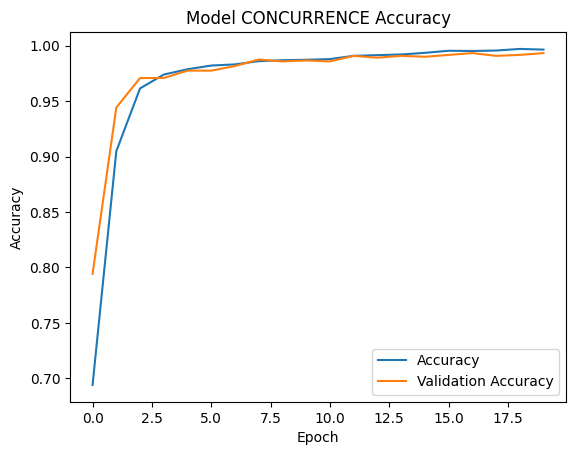

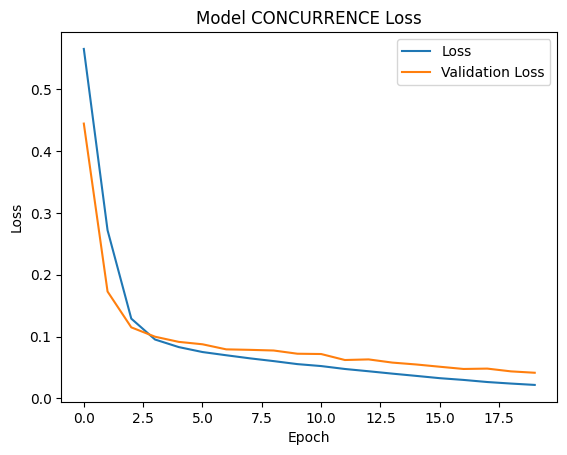

Epoch 1/20


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1:26 583ms/step - accuracy: 0.5000 - loss: 0.6862

126/150 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.6746 - loss: 0.6141  

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6814 - loss: 0.6039 - val_accuracy: 0.8825 - val_loss: 0.3764


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8438 - loss: 0.4358

121/150 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.8944 - loss: 0.3079

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.8995 - loss: 0.2952 - val_accuracy: 0.9592 - val_loss: 0.1338


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.1369

117/150 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.9588 - loss: 0.1284

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.9601 - loss: 0.1246 - val_accuracy: 0.9767 - val_loss: 0.0753


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0493

122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.9768 - loss: 0.0762

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.9771 - loss: 0.0748 - val_accuracy: 0.9833 - val_loss: 0.0525


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.1505

134/150 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.9860 - loss: 0.0491

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.9858 - loss: 0.0492 - val_accuracy: 0.9917 - val_loss: 0.0374


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0211

121/150 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.9895 - loss: 0.0365

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9893 - loss: 0.0368 - val_accuracy: 0.9933 - val_loss: 0.0283


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0119

147/150 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.9904 - loss: 0.0314

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.9904 - loss: 0.0314 - val_accuracy: 0.9942 - val_loss: 0.0247


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0262

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9920 - loss: 0.0268

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.9922 - loss: 0.0265 - val_accuracy: 0.9950 - val_loss: 0.0204


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0448

143/150 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.9921 - loss: 0.0250

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.9922 - loss: 0.0249 - val_accuracy: 0.9958 - val_loss: 0.0181


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0085

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.9947 - loss: 0.0193 - val_accuracy: 0.9967 - val_loss: 0.0145


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0068

136/150 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.9957 - loss: 0.0133

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.9957 - loss: 0.0134 - val_accuracy: 0.9983 - val_loss: 0.0167


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0063

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9973 - loss: 0.0124

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.9972 - loss: 0.0123 - val_accuracy: 0.9967 - val_loss: 0.0183


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0179

133/150 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9962 - loss: 0.0127

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9963 - loss: 0.0125 - val_accuracy: 0.9967 - val_loss: 0.0128


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0069

130/150 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.9975 - loss: 0.0094

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.9975 - loss: 0.0094 - val_accuracy: 0.9967 - val_loss: 0.0114


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0156

121/150 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.9986 - loss: 0.0080

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.9984 - loss: 0.0080 - val_accuracy: 0.9983 - val_loss: 0.0090


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0037

117/150 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.9977 - loss: 0.0062

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.9979 - loss: 0.0061 - val_accuracy: 0.9983 - val_loss: 0.0076


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0022

127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9993 - loss: 0.0056

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.9993 - loss: 0.0056 - val_accuracy: 0.9967 - val_loss: 0.0098


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0015

117/150 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.9993 - loss: 0.0041

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9975 - val_loss: 0.0089


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0075

122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.9996 - loss: 0.0040

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.9995 - loss: 0.0041 - val_accuracy: 0.9983 - val_loss: 0.0063


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0018

120/150 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.9988 - loss: 0.0042

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.9989 - loss: 0.0041 - val_accuracy: 0.9983 - val_loss: 0.0070


2024/05/22 18:31:32 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 8.2017e-04

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9991 - loss: 0.0064   


Registered model 'QuantumStateClassifier-ENTROPY' already exists. Creating a new version of this model...
2024/05/22 18:31:34 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-ENTROPY, version 4


Model saved in run 7331754c1ef14a609a5c67e105d4a31d


Created version '4' of model 'QuantumStateClassifier-ENTROPY'.


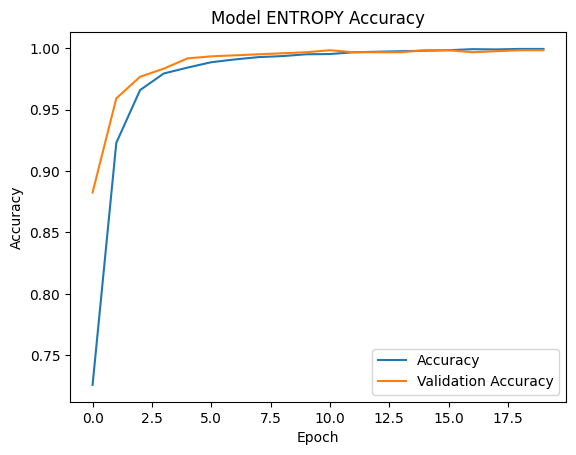

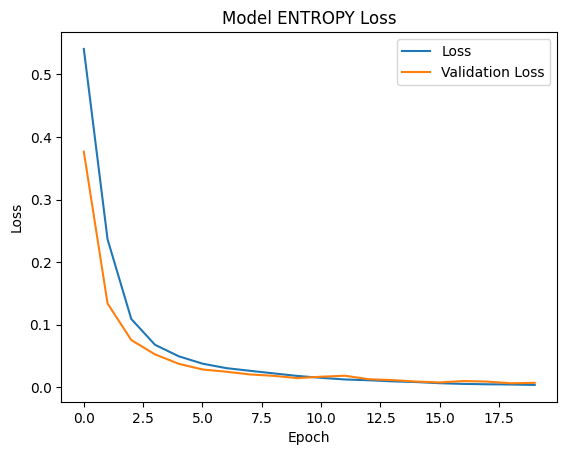

Epoch 1/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1:25 575ms/step - accuracy: 0.6250 - loss: 0.6820

126/150 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.6720 - loss: 0.6111  

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6795 - loss: 0.6005 - val_accuracy: 0.8625 - val_loss: 0.3583


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.2462

138/150 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.9076 - loss: 0.2777

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.9094 - loss: 0.2725 - val_accuracy: 0.9617 - val_loss: 0.1223


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0746

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.9660 - loss: 0.1115

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.9667 - loss: 0.1080 - val_accuracy: 0.9825 - val_loss: 0.0730


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.1595

139/150 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.9800 - loss: 0.0692

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.9800 - loss: 0.0686 - val_accuracy: 0.9850 - val_loss: 0.0458


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.0749

112/150 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.9856 - loss: 0.0465

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.9861 - loss: 0.0456 - val_accuracy: 0.9900 - val_loss: 0.0343


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0342

116/150 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.9884 - loss: 0.0382

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9887 - loss: 0.0373 - val_accuracy: 0.9892 - val_loss: 0.0283


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0264

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9923 - loss: 0.0298

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.9925 - loss: 0.0290 - val_accuracy: 0.9958 - val_loss: 0.0241


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0249

127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9958 - loss: 0.0198

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9957 - loss: 0.0201 - val_accuracy: 0.9958 - val_loss: 0.0225


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0126

105/150 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.9972 - loss: 0.0143

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.9965 - loss: 0.0154 - val_accuracy: 0.9933 - val_loss: 0.0142


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0147

125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.9957 - loss: 0.0134

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.9957 - loss: 0.0135 - val_accuracy: 0.9950 - val_loss: 0.0109


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0057

131/150 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.9954 - loss: 0.0165

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.9955 - loss: 0.0160 - val_accuracy: 0.9967 - val_loss: 0.0117


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.0495

125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.9956 - loss: 0.0127

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.9957 - loss: 0.0125 - val_accuracy: 0.9967 - val_loss: 0.0085


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0023

119/150 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.9984 - loss: 0.0081

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9983 - loss: 0.0082 - val_accuracy: 0.9992 - val_loss: 0.0107


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0054

139/150 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.9985 - loss: 0.0061

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.9985 - loss: 0.0062 - val_accuracy: 0.9958 - val_loss: 0.0076


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0138

119/150 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.9976 - loss: 0.0070

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.9978 - loss: 0.0070 - val_accuracy: 0.9992 - val_loss: 0.0063


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0060

122/150 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.9979 - loss: 0.0072

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9979 - loss: 0.0072 - val_accuracy: 0.9975 - val_loss: 0.0054


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0108

105/150 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 1.0000 - loss: 0.0033

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.9999 - loss: 0.0035 - val_accuracy: 0.9983 - val_loss: 0.0065


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0158

115/150 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.9995 - loss: 0.0035

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9992 - val_loss: 0.0051


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0039

136/150 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.9999 - loss: 0.0035

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.9999 - loss: 0.0035 - val_accuracy: 0.9967 - val_loss: 0.0053


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 3.2259e-04

129/150 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.9994 - loss: 0.0028   

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9992 - val_loss: 0.0032


2024/05/22 18:31:37 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 5.8859e-04

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.9993 - loss: 0.0033   


Registered model 'QuantumStateClassifier-NEGATIVITY' already exists. Creating a new version of this model...
2024/05/22 18:31:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-NEGATIVITY, version 4


Model saved in run 6d979ea9a17c4e169bbd5b12c13adf18


Created version '4' of model 'QuantumStateClassifier-NEGATIVITY'.


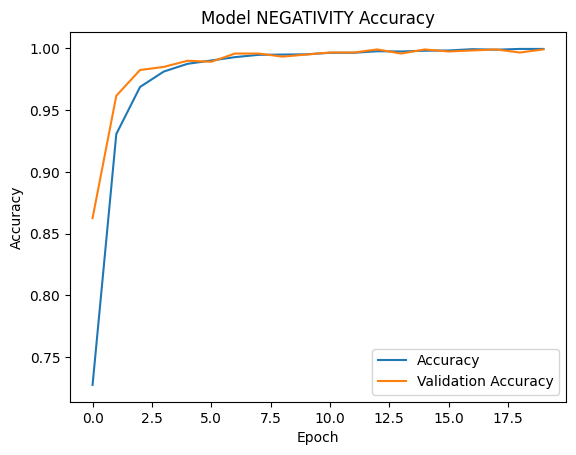

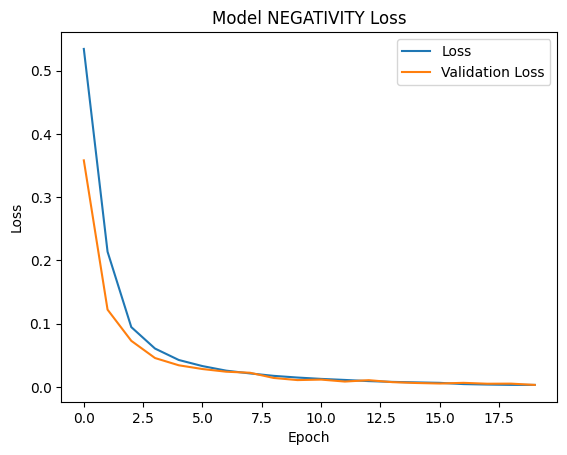

Epoch 1/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1:24 570ms/step - accuracy: 0.5625 - loss: 0.6937

 95/150 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.7237 - loss: 0.5961  

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7292 - loss: 0.5748 - val_accuracy: 0.7525 - val_loss: 0.4610


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7812 - loss: 0.4917

120/150 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.7917 - loss: 0.4267

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.7980 - loss: 0.4204 - val_accuracy: 0.8508 - val_loss: 0.3527


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8750 - loss: 0.3751

135/150 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8662 - loss: 0.3293

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.8679 - loss: 0.3265 - val_accuracy: 0.8725 - val_loss: 0.2779


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9062 - loss: 0.2534

125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.9036 - loss: 0.2488

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.9049 - loss: 0.2460 - val_accuracy: 0.9200 - val_loss: 0.2096


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8750 - loss: 0.2985

127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9324 - loss: 0.1893

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.9336 - loss: 0.1875 - val_accuracy: 0.9433 - val_loss: 0.1630


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7812 - loss: 0.2697

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.9476 - loss: 0.1612

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9508 - loss: 0.1567 - val_accuracy: 0.9367 - val_loss: 0.1382


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.1466

133/150 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.9669 - loss: 0.1152

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.9673 - loss: 0.1148 - val_accuracy: 0.9683 - val_loss: 0.1112


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.0914

107/150 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.9704 - loss: 0.1016

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.9710 - loss: 0.1000 - val_accuracy: 0.9725 - val_loss: 0.1004


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0764

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.9752 - loss: 0.0858

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.9752 - loss: 0.0859 - val_accuracy: 0.9633 - val_loss: 0.0949


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0775

131/150 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.9839 - loss: 0.0776

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.9835 - loss: 0.0774 - val_accuracy: 0.9767 - val_loss: 0.0808


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0655

137/150 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.9803 - loss: 0.0719

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.9804 - loss: 0.0717 - val_accuracy: 0.9767 - val_loss: 0.0766


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0236

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9795 - loss: 0.0660

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.9793 - loss: 0.0662 - val_accuracy: 0.9758 - val_loss: 0.0737


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0416

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.9824 - loss: 0.0631

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.9827 - loss: 0.0624 - val_accuracy: 0.9658 - val_loss: 0.0875


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9688 - loss: 0.0919

107/150 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.9782 - loss: 0.0643

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.9793 - loss: 0.0629 - val_accuracy: 0.9783 - val_loss: 0.0677


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0422

117/150 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.9832 - loss: 0.0573

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9827 - loss: 0.0579 - val_accuracy: 0.9808 - val_loss: 0.0640


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0610

103/150 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.9794 - loss: 0.0586

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.9798 - loss: 0.0578 - val_accuracy: 0.9742 - val_loss: 0.0670


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0211

120/150 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.9856 - loss: 0.0507

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9852 - loss: 0.0507 - val_accuracy: 0.9858 - val_loss: 0.0562


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0860

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.9836 - loss: 0.0527

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.9839 - loss: 0.0520 - val_accuracy: 0.9783 - val_loss: 0.0574


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0297

124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9877 - loss: 0.0425

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.9873 - loss: 0.0434 - val_accuracy: 0.9717 - val_loss: 0.0736


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0510

124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9868 - loss: 0.0450

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.9866 - loss: 0.0453 - val_accuracy: 0.9742 - val_loss: 0.0623


2024/05/22 18:31:42 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9375 - loss: 0.1006

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.9716 - loss: 0.0666


Registered model 'QuantumStateClassifier-CHSH' already exists. Creating a new version of this model...
2024/05/22 18:31:43 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CHSH, version 4


Model saved in run 711f3755102f4632a00f851cc402b98a


Created version '4' of model 'QuantumStateClassifier-CHSH'.


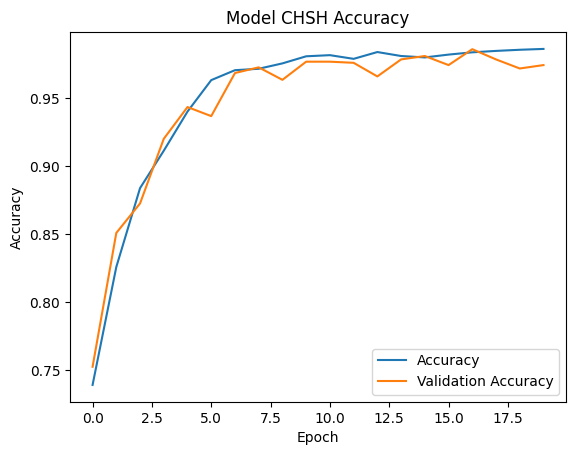

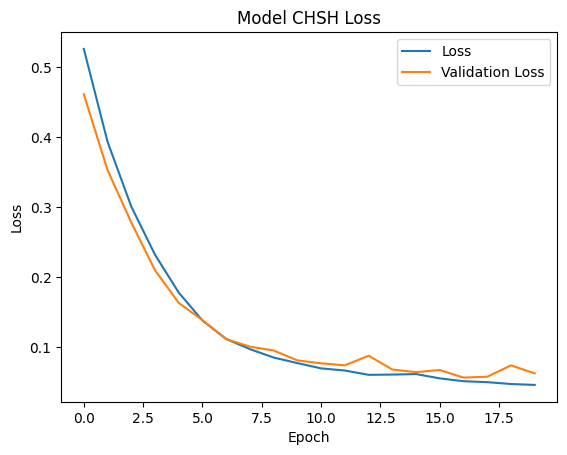

In [7]:
models = {}
parameter_witness = {WITNESS_NAME: witnesses[WITNESS_NAME]}

mlflow.set_experiment('ML Quantum entanglement')

for name, witness in witnesses.items():
    data_file_path = "./simulated_data/simulation-{}.npz".format(name)
    model = get_model(name, data_file_path)
    models[name] = {"model": model, "witness": witness}
